In [1]:
### 선형, 다중, 다항, 릿지, 라쏘 연습...
### - 만족도 : 종속변수
### - 위 모델 중에 가장 적합한 모델 선정하기

In [17]:
import pandas as pd 
import numpy as np

In [3]:
file_path = "./data/04_(문제)_회귀모델_drinking_water.csv"
df =  pd.read_csv(file_path)

df

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2
...,...,...,...
259,3,4,4
260,3,4,3
261,4,4,4
262,4,4,4


In [4]:
### 데이터프레임을 numpy 배열 타입으로 변환하기 
drinking_water = df.to_numpy()
drinking_water
print(drinking_water.shape)

(264, 3)


In [6]:
input = drinking_water[:, :-1]
target = drinking_water[:, -1]

In [9]:
### 훈련 및 테스트 데이터로 구분하기 : 비율 70:30
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(input, target,  
                               test_size=0.3, random_state=42)

In [ ]:
######################################
### ------- 선형회귀모델 --------
######################################

In [10]:
### 선형회귀모델 : LineatRegression 
from sklearn.linear_model import LinearRegression

In [11]:
### 사용중인 데이터 확인하기
print(train_input.shape, train_target.shape)

(184, 2) (184,)


In [12]:
### 모델 생성하기 : 변수명 lr 
lr = LinearRegression() 
lr

LinearRegression()

In [13]:
### 모델 훈련 시키기
lr.fit(train_input, train_target)

LinearRegression()

In [14]:
### 훈련데이터로 모델 평가하기
train_score = lr.score(train_input, train_target)
train_score

0.5950070910768899

In [15]:
### 테스트데이터로 모델 평가하기
test_score = lr.score(test_input, test_target)
test_score

0.5721621472828096

In [ ]:
######################################
### ------- 다항회귀모델 --------
######################################

In [18]:
### 훈련 및 테스트 데이터를 2개의 열(특성)로 만들기
# 훈련 : trian_poly 변수 사용
# 테스트 : test_poly 변수 사용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [19]:
print(train_poly.shape, test_poly.shape)

(184, 4) (80, 4)


In [20]:
### 모델 생성하기
# - 선형회귀, 다항회귀, 다중회귀의 모델은 하나의 모델(클래스)를 사용
# - 사용되는 데이터의 형태에 따라서 선형, 다항, 다중회귀로 분류됨
# - 모델(클래스)가 데이터의 형태에 따라서 알아서 훈련시킴

lr = LinearRegression()
lr

LinearRegression()

In [21]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [22]:
### 훈련데이터를 이용해서 모델 평가하기
train_score = lr.score(train_poly, train_target)
train_score

0.6278040993373002

In [23]:
### 테스트데이터를 이용해서 모델 평가하기
test_score = lr.score(test_poly, test_target)
test_score

0.5794748720632494

In [ ]:
######################################
### ------- 다중회귀모델 --------
######################################

In [24]:
### 라이브러리 불러들이기
from sklearn.preprocessing import PolynomialFeatures

In [25]:
### 클래스 생성하기
# -절편 없애기 : include_bias=False
# degree=2 : 특성을 생성할 때는 차원의 값을 이용해서 객수가 만들어집니다.
#          : 디폴트로 2입니다.
poly = PolynomialFeatures(degree=2, include_bias=False)  # poly = PolynomialFeatures(include_bias=False) 
 
### 패턴 조합 찾기(훈련데이터)
# - 패턴 조합을 찾을 때는 훈련데이터를 이용합니다.
poly.fit(train_input)

### 찾은 패턴 조합으로 변환하기(훈련데이터)
train_poly = poly.transform(train_input)

### 찾은 패턴 조합으로 테스트데이터 변환하기
test_poly = poly.transform(test_input)


print(train_poly.shape, test_poly.shape)

(184, 5) (80, 5)


In [26]:
### 패키지
from sklearn.linear_model import LinearRegression

In [27]:
### 클래스(모델) 생성하기
lr = LinearRegression()
lr

LinearRegression()

In [28]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [29]:
### 정확도(평가) 확인하기 (훈련데이터, 테스트데이터)
train_score = lr.score(train_poly, train_target) 
test_score = lr.score(test_poly, test_target) 

print(train_score, test_score)

0.6465976870206376 0.6151771253466041


In [30]:
### 특성갯수 늘리기 ###########################################

### degree의 갯수를 큰값으로 설정
poly = PolynomialFeatures(degree=5, include_bias=False)

### 특성 조합의 패턴(조합) 찾기
poly.fit(train_input)

### 찾은 패턴(조합)으로 변환하기
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [31]:
train_poly.shape, test_poly.shape

((184, 20), (80, 20))

In [32]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [33]:
### 정확도(결정계수)
train_score = lr.score(train_poly, train_target)
test_score = lr.score(test_poly, test_target)

train_score, test_score

(0.6745951036443993, 0.16198418277344684)

In [ ]:
### 정규화 하기 ###########################################

In [34]:
### 사용 패키지 (전처리 라이브러리 : preprocessing)
from sklearn.preprocessing import StandardScaler

In [35]:
### 클래스 생성
ss = StandardScaler()
ss

StandardScaler()

In [36]:
### 표준화를 위한 점수를 생성하기 위한 패턴 찾기
ss.fit(train_poly)

StandardScaler()

In [37]:
### 찾은 패턴으로 데이터 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [38]:
train_scaled.shape, test_scaled.shape

((184, 20), (80, 20))

In [40]:
### 평균, 표준편차 확인하기
ss.mean_, ss.scale_

(array([  2.91304348,   3.14673913,   9.38043478,   9.57065217,
         10.6576087 ,  32.19565217,  32.03804348,  33.57065217,
         38.16847826, 115.94565217, 114.04891304, 116.3423913 ,
        124.125     , 143.04891304, 434.97826087, 425.42934783,
        428.26630435, 444.30978261, 479.72282609, 557.16847826]),
 array([  0.94583956,   0.86927645,   5.2870687 ,   4.97443547,
          5.42810187,  25.61408373,  24.96592609,  25.36656066,
         28.05117385, 121.53523055, 119.5428466 , 121.02976254,
        125.54524832, 138.25485603, 578.01875775, 571.07643915,
        575.35636382, 589.87320553, 616.30062568, 674.0942626 ]))

In [ ]:
######################################
### ------- 릿지모델 --------
######################################

In [41]:
### 사용 패키지
from sklearn.linear_model import Ridge

In [42]:
# 클래스(모델) 생성하기
ridge = Ridge()
ridge

Ridge()

In [43]:
# 훈련시키기
ridge.fit(train_scaled, train_target)

Ridge()

In [44]:
# 정확도(결정계수) 확인하기 (훈련 및 테스트)
train_scroe = ridge.score(train_scaled, train_target)
test_scroe = ridge.score(test_scaled, test_target)

In [45]:
train_scroe, test_scroe

(0.6484615808699277, 0.6087540389868844)

In [ ]:
### 규제 강도 조절 하기 ###########################################

In [46]:
### 시각화 패키지
import matplotlib.pyplot as plt

In [47]:
### alpha 값을 이용한 결과를 담기 위한 변수
train_score = []
test_score  = []

In [48]:
### alpha 값의 범위 지정
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

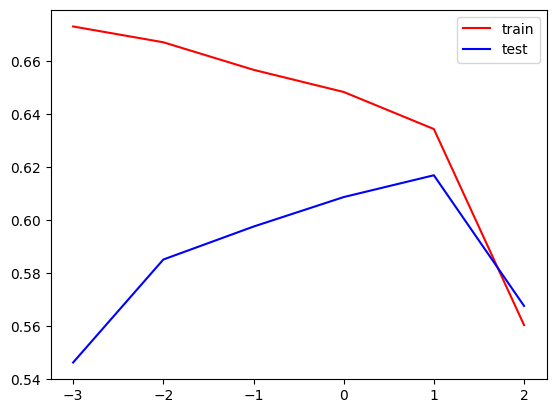

In [49]:
### alpha 값(규제강도)를 변경하면서 반복 수행한 결과 담기
for alpha in alpha_list : 
    ### 모델 생성하기 : 생성시 규제강도 속성 값 정의
    ridge = Ridge(alpha = alpha)
    
    ### 훈련시키기
    ridge.fit(train_scaled, train_target)
    
    ### 정확도(결정계수) 결과 변수에 담기
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
### 훈련 및 테스트 정확도(결정계수) 값을 이용하여 시각화하기
plt.plot(np.log10(alpha_list), train_score, label="train", c="red")
plt.plot(np.log10(alpha_list), test_score, label="test", c="blue")


plt.legend()
plt.show()

In [50]:
### 릿지모델에 알파값 10 적용하여 훈련시키기  # 그래프에서 x축 1 인 지점이 10 임
# 훈련모델 생성하기 : 알파값 적용
ridge = Ridge(alpha = 10)    # 디폴트는 alpha = 1 임
ridge

Ridge(alpha=10)

In [51]:
### 훈련 시키기
ridge.fit(train_scaled, train_target)

Ridge(alpha=10)

In [52]:
### 알파값 10 일때 릿지모델 정확도 확인하기
train_score = ridge.score(train_scaled, train_target) 
test_score = ridge.score(test_scaled, test_target)     

train_score, test_score

(0.6344610137948823, 0.6169928966400873)

In [53]:
######################################
### ------- 라쏘모델 --------
######################################

In [54]:
### 패키지 적용하기
from sklearn.linear_model import Lasso

In [55]:
### 클래스 (모델 생성하기)
lasso = Lasso()
lasso

Lasso()

In [56]:
### 훈련시키기
lasso.fit(train_scaled, train_target)

Lasso()

In [57]:
### 정확도(결정계수) 확인하기 : 훈련 및 테스트
train_scroe = lasso.score(train_scaled, train_target)
test_scroe = lasso.score(test_scaled, test_target)

train_scroe, test_scroe

(0.0, -0.04627624123298668)

In [ ]:
### 라쏘 알파값 튜닝하기 ########################################### 

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e-01, tolerance: 1.297e-02
  model = cd_fast.enet_coordinate_descent(


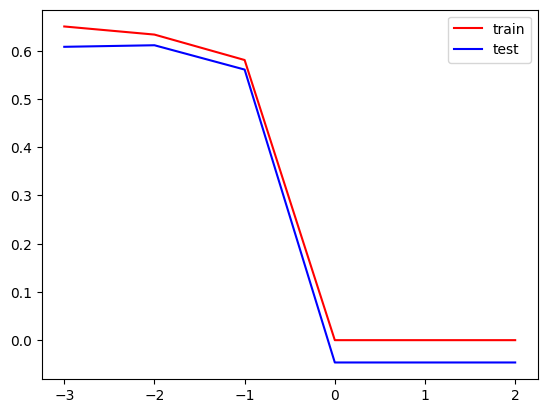

In [58]:
### alpha 값을 이용한 결과를 담기 위한 변수
train_score = []
test_score  = []

### alpha 값의 범위 지정
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### alpha 값(규제강도)를 변경하면서 반복 수행한 결과 담기
for alpha in alpha_list : 
    ### 모델 생성하기 : 생성시 규제강도 속성 값 정의
    lasso = Lasso(alpha = alpha)
    
    ### 훈련시키기
    lasso.fit(train_scaled, train_target)
    
    ### 정확도(결정계수) 결과 변수에 담기
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
### 훈련 및 테스트 정확도(결정계수) 값을 이용하여 시각화하기
plt.plot(np.log10(alpha_list), train_score, label="train", c="red")
plt.plot(np.log10(alpha_list), test_score, label="test", c="blue")


plt.legend()
plt.show()

In [59]:
### 릿지모델에 알파값 0.01 적용하여 훈련시키기  # 그래프에서 x축 -2 인 지점이 0.01임
# 훈련모델 생성하기 : 알파값 적용
lasso = Lasso(alpha = 0.01)    # 디폴트는 alpha = 1 임
lasso

Lasso(alpha=0.01)

In [60]:
### 훈련 시키기
lasso.fit(train_scaled, train_target)

Lasso(alpha=0.01)

In [61]:
### 알파값 0.1 일때 릿지모델 정확도 확인하기
train_score = lasso.score(train_scaled, train_target) 
test_score = lasso.score(test_scaled, test_target)     

train_score, test_score

(0.6336164362519615, 0.611491806047072)

In [ ]:
# 선형회귀모델          ->  (0.5950070910768899, 0.5721621472828096)
# 다항회귀모델          ->  (0.6278040993373002, 0.5794748720632494)
# 다중회귀모델          ->  (0.6465976870206376 0.6151771253466041)
# 릿지모델(alpha=1)     ->  (0.6484615808699277, 0.6087540389868844)
# 릿지모델(alpha=10)    ->  (0.6344610137948823, 0.6169928966400873)
# 라쏘모델(alpha=1)     ->  (0.0, -0.04627624123298668)
# 라쏘모델(alpha=0.01)  ->  (0.6336164362519615, 0.611491806047072)

# 최종적으로 ???모델로 선택